In [59]:
# import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
#import lightgbm as lgb

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier


### Define the following functions as per the description, so that they can be called later to perform the tasks.

In [60]:
# to treat missing values

def treat_null_values(df, column, method):
    imputer= Imputer(strategy= method)
    imputer= imputer.fit(df[[column]])
    new_df= imputer.transform(df[[column]])
    return pd.Dataframe(new_df)    

In [61]:

# to seperate the numerical and categorical columns

def num_and_cat_columns(df):
    """Return seperate list of numerical & categorical columns.
    
    This function accepts a dataframe and returns two lists,
    one containing the names of numerical columns(num_cols) and the other categorical columns(cat_cols).
        
    Keyword arguments:
    df -- pandas dataframe for which we want the list of columns
    
    Returns:
    num_cols -- list of numerical columns
    cat_cols -- list of categorical columns
    """
    numeric_var = [key for key in dict(df.dtypes)
                   if dict(df.dtypes)[key]
                       in ['float64','float32','int32','int64']] # Numeric Variable
    
    cat_var = [key for key in dict(df.dtypes)
             if dict(df.dtypes)[key] in ['object'] ] # Categorical Varible
    
    return numeric_var,cat_var
    

In [62]:
# to clean the dollar sign from the currency column & convert it to float.
    
def clean_dollar(df, column):
    """Removes "$" sign from a column & converts it to float.
    
    This function accepts a dataframe and columns with $ sign to be converted to float.
        
    Keyword arguments:
    df -- pandas dataframe for which we want to encode the columns
    col -- list of columns that is to be converted
    
    Returns:
    df -- the converted dataframe
    """
    new_df = df[column].apply(lambda x: x.replace('$', '').replace(',', '')
                                if isinstance(x, str) else x).astype(float)
    return new_df

In [63]:
# to apply transformation to any column

def power_trans(df,col,power):
    """Apply transformation to the column(s).
    
    This function will apply the passed transformation to the given dataframe & columns.
    You can pass multiple columns to this function.
        
    Keyword arguments:
    df -- pandas dataframe which has the data
    col -- list of all the features for which we want to apply the transformation
    transformation -- the transformation we want to apply
    """
    lst = []
    for i in df[col]:
        if i < 0:
            lst.append(-np.power(abs(i),power))
        else:
            lst.append(np.power(i,power))
    return pd.DataFrame(lst)
    
    

In [64]:
# to check outliers using box plot

def check_outliers(df, col, cat):
    """Check outliers through boxplot.
    
    This function plots and displays the boxplot of the feature col vs all the categories defined. 
    Check for any outlier present.
        
    Keyword arguments:
    df -- pandas dataframe which has the data
    col -- the feature for which we want to plot the boxplot
    cat -- the list of features (categorical) by which we want to check the outliers (for each category in each feature)
    """
    
    

### Read the dataset. Take a look at the dataset. 

* Check the data types present in the dataframe.
* Call the num_and_cat_columns() with train as the parameter and store the results.
* Are there any missing values? Are there any Outliers? How do you want to treat them?


In [97]:
# Code starts here
train= pd.read_csv(r"C:\Users\vaibh\Desktop\Python DS\Sprint 6_Move to Melbourne\Sprint 6_Employee Compensation Analysis\file (1)\train.csv")
train.head()

,Id,Year Type,Year,Organization Group,Department,Union,Job Family,Job,Employee Identifier,Retirement,Health and Dental,Other Benefits,Total Compensation
0,0,Calendar,2018,Community Health,NaN,"Prof & Tech Eng, Local 21",Information Systems,IS Business Analyst-Principal,8594384,$0.0,$13527.66,$0.0,0.00
1,1,Calendar,2014,"Public Works, Transportation & Commerce",MTA Municipal Transprtn Agncy,"SEIU - Miscellaneous, Local 1021",Public Service Aide,Publ Svc Aide-Asst To Prof,22142,$0.0,$3995.56,$875.27,16176.35
2,2,Fiscal,2018,General City Responsibilities,NaN,"SEIU, Local 1021, Misc","Payroll, Billing & Accounting",Senior Account Clerk,8512172,$0.0,$0.0,$0.0,248.30
3,3,Fiscal,2015,Community Health,DPH Public Health,"SEIU - Miscellaneous, Local 1021",Purchasing & Storekeeping,Sr Materials & Supplies Sprv,47593,$11671.59,$10680.55,$4400.24,80020.86
4,4,Fiscal,2014,Community Health,DPH Public Health,"SEIU - Miscellaneous, Local 1021",Hospital Administration,Medical Records Technician,47549,$14617.66,$12464.61,$5562.09,101207.38


In [98]:
# Call the num_and_cat_columns() with train as the parameter and store the results.
num_cols,cat_cols= num_and_cat_columns(train)
print("Numerical Columns-",num_cols)
print("Categorical Columns-",cat_cols)

Numerical Columns- ['Id', 'Year', 'Employee Identifier', 'Total Compensation']
Categorical Columns- ['Year Type', 'Organization Group', 'Department', 'Union', 'Job Family', 'Job', 'Retirement', 'Health and Dental', 'Other Benefits']


In [99]:
# Are there any missing values?  How do you want to treat them?
print(train.shape)
print(train.isnull().sum())
print(train.nunique())

(567103, 13)
Id                          0
Year Type                   0
Year                        0
Organization Group          0
Department             295065
Union                     345
Job Family                  0
Job                         3
Employee Identifier         0
Retirement                  0
Health and Dental           0
Other Benefits              0
Total Compensation          0
dtype: int64
Id                     567103
Year Type                   2
Year                        8
Organization Group          7
Department                 56
Union                     121
Job Family                 59
Job                      1123
Employee Identifier    102906
Retirement             227345
Health and Dental      115380
Other Benefits         272977
Total Compensation     339848
dtype: int64


In [100]:
# Drop the Column 'Id' because all unique values and column 'Department' because half of them are null values. 
train.drop(['Id'], axis=1, inplace=True)
train.drop(['Department'], axis=1, inplace=True)
train.drop(['Employee Identifier'], axis=1, inplace=True)
train.drop(['Job'],axis=1, inplace=True)

In [101]:
# Fill the empty values from 'Union' column as 'Unrepresented'
train['Union'].fillna('Unrepresented', inplace=True)
print(train['Union'].nunique())
print(train.isnull().sum())

122
Year Type             0
Year                  0
Organization Group    0
Union                 0
Job Family            0
Retirement            0
Health and Dental     0
Other Benefits        0
Total Compensation    0
dtype: int64


### Visualize the data

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Clean the data and apply some data preprocessing techniques

In [102]:
train.head()

,Year Type,Year,Organization Group,Union,Job Family,Retirement,Health and Dental,Other Benefits,Total Compensation
0,Calendar,2018,Community Health,"Prof & Tech Eng, Local 21",Information Systems,$0.0,$13527.66,$0.0,0.00
1,Calendar,2014,"Public Works, Transportation & Commerce","SEIU - Miscellaneous, Local 1021",Public Service Aide,$0.0,$3995.56,$875.27,16176.35
2,Fiscal,2018,General City Responsibilities,"SEIU, Local 1021, Misc","Payroll, Billing & Accounting",$0.0,$0.0,$0.0,248.30
3,Fiscal,2015,Community Health,"SEIU - Miscellaneous, Local 1021",Purchasing & Storekeeping,$11671.59,$10680.55,$4400.24,80020.86
4,Fiscal,2014,Community Health,"SEIU - Miscellaneous, Local 1021",Hospital Administration,$14617.66,$12464.61,$5562.09,101207.38


In [103]:
# Code starts here

# Have a look at the features, check the type where any currency is involved. 
# We have columns with compensations stored in form of strings. We need to clean it and convert this to numeric. 
# Call the clean_dollar() to do the same. 
curr_columns=['Retirement','Health and Dental','Other Benefits']
train['Retirement']= clean_dollar(train, 'Retirement')
train['Health and Dental']= clean_dollar(train, 'Health and Dental')
train['Other Benefits']= clean_dollar(train, 'Other Benefits')
train.head()

,Year Type,Year,Organization Group,Union,Job Family,Retirement,Health and Dental,Other Benefits,Total Compensation
0,Calendar,2018,Community Health,"Prof & Tech Eng, Local 21",Information Systems,0.00,13527.66,0.00,0.00
1,Calendar,2014,"Public Works, Transportation & Commerce","SEIU - Miscellaneous, Local 1021",Public Service Aide,0.00,3995.56,875.27,16176.35
2,Fiscal,2018,General City Responsibilities,"SEIU, Local 1021, Misc","Payroll, Billing & Accounting",0.00,0.00,0.00,248.30
3,Fiscal,2015,Community Health,"SEIU - Miscellaneous, Local 1021",Purchasing & Storekeeping,11671.59,10680.55,4400.24,80020.86
4,Fiscal,2014,Community Health,"SEIU - Miscellaneous, Local 1021",Hospital Administration,14617.66,12464.61,5562.09,101207.38


In [104]:
# Call the num_and_cat_columns() with train as the parameter and store the results. AGAIN
num_cols,cat_cols= num_and_cat_columns(train)
print("Numerical Columns-",num_cols)
print("Categorical Columns-",cat_cols)
train.nunique()

Numerical Columns- ['Year', 'Retirement', 'Health and Dental', 'Other Benefits', 'Total Compensation']
Categorical Columns- ['Year Type', 'Organization Group', 'Union', 'Job Family']


Year Type                  2
Year                       8
Organization Group         7
Union                    122
Job Family                59
Retirement            227345
Health and Dental     115380
Other Benefits        272977
Total Compensation    339848
dtype: int64

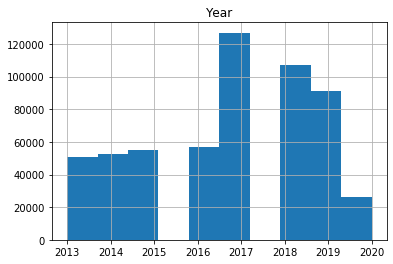

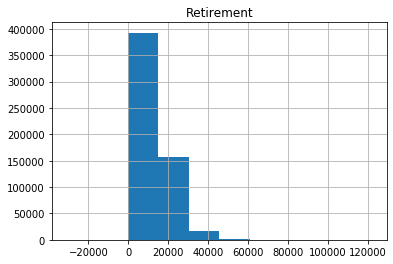

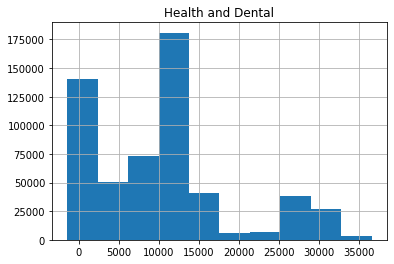

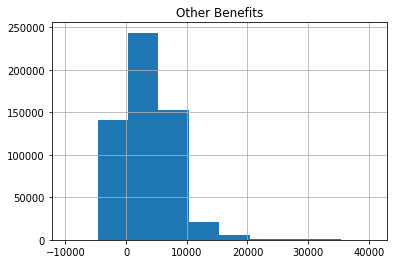

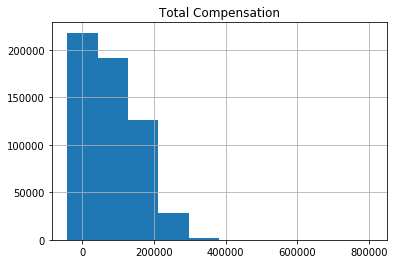

In [105]:
# Check the distribution of certain columns you might find of interest. 
# This can be done by calling the plot_distribution(). 
for column in num_cols:
    train[column].hist()
    plt.title(column)
    plt.show()

In [106]:
# Apply some good transformation if required. Call transform_column() to do the same.
train['Retirement']= power_trans(train,'Retirement',0.56)
train['Health and Dental']= power_trans(train,'Health and Dental',0.77)
train['Other Benefits']= power_trans(train,'Other Benefits',0.53)

In [19]:
from sklearn.preprocessing import LabelBinarizer

In [ ]:
label_encoder= LabelBinarizer()

In [ ]:
train= pd.concat([pd.DataFrame(label_encoder.fit_transform(train['Union'])),train], axis=1)
train.head()

In [91]:
print(train.shape)
train.nunique()

(567103, 9)


Year Type                  2
Year                       8
Organization Group         7
Union                    122
Job Family                59
Retirement            227345
Health and Dental     115380
Other Benefits        272977
Total Compensation    339848
dtype: int64

In [92]:
# to encode the categorical column so as to convert them to numeric.
# Before we proceed with the model fitting, we need to get rid of the categorical columns.
# We can use One Hot Encoding or Label Encoding to convert the categorical columns to numeric.
#Call the encode_category() with the list of columns and the method of encoding to do the same.
train= pd.concat([pd.get_dummies(train['Union']),train], axis=1)
train= pd.concat([pd.get_dummies(train['Job Family']),train], axis=1)
train= pd.concat([pd.get_dummies(train['Year']),train], axis=1)
train= pd.concat([pd.get_dummies(train['Year Type']),train], axis=1)

In [107]:
train.drop(['Organization Group','Job Family','Union','Year','Year Type'],axis=1, inplace=True)
print(train.shape)
train.head()

(567103, 4)


,Retirement,Health and Dental,Other Benefits,Total Compensation
0,0.000000,1517.195211,0.000000,0.00
1,0.000000,593.218649,36.252276,16176.35
2,0.000000,0.000000,0.000000,248.30
3,189.492844,1264.786104,85.318355,80020.86
4,214.947105,1424.533264,96.599782,101207.38


In [108]:
# Now since we have encoded all the categorical columns, there shouldn't be any left in the data.
# Check the same by calling num_and_cat_columns()
num_cols,cat_cols= num_and_cat_columns(train)
print("Numerical Columns-",num_cols)
print("Categorical Columns-",cat_cols)

Numerical Columns- ['Retirement', 'Health and Dental', 'Other Benefits', 'Total Compensation']
Categorical Columns- []


### Model building

- Separate the features and target.
- Now let's come to the actual task, using linear regression, predict the `Total Compensation`. Use different techniques you have learned to imporove the performance of the model.
- Try improving upon the `r2_score` (R-Square) using different parameters that give the best score. Call the `fit_model()` with respective parameters.



In [95]:
# Code Starts here
# Split the train data into train and validation set
X= train.drop('Total Compensation',1)
y= train['Total Compensation']

highest_r2_scr= 0
chosen_state= 0

for n in range(10):
    random_state=n
    X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=random_state,test_size=0.3)
    
    #Standardize the data
    Scaler= StandardScaler()
    X_train= Scaler.fit_transform(X_train)
    X_test= Scaler.transform(X_test)
    
    #Initialize the Linear Regression Model
    model=LinearRegression()
    
    #Predict the accuracy score
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    r2_scr= r2_score(y_test,pred)
    if r2_scr>highest_r2_scr:
        highest_r2_scr=r2_scr
        chosen_state=n
print("The highest r2_score using Linear Regression Model is {} with chosen random state {}".format(highest_r2_scr,chosen_state))
# Code ends here.

The highest r2_score using Linear Regression Model is 0.9237772480326605 with chosen random state 5


In [131]:
# Split the train data into train and validation set
X= train.drop('Total Compensation',1)
y= train['Total Compensation']

highest_r2_scr= 0
chosen_state= 0

for n in range(10):
    random_state=n
    X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=random_state,test_size=0.3)
    
    #Standardize the data
    Scaler= StandardScaler()
    X_train= Scaler.fit_transform(X_train)
    X_test= Scaler.transform(X_test)
    
    #Initialize the Ridge Model
    ridge=Ridge()
    
    
    #Polynomial Features
    poly= PolynomialFeatures()
    X_train=poly.fit_transform(X_train)
    X_test=poly.transform(X_test)
    
    #Predict the accuracy score
    ridge.fit(X_train,y_train)
    pred=ridge.predict(X_test)
    r2_scr= r2_score(y_test,pred)  
    if r2_scr>highest_r2_scr:
        highest_r2_scr=r2_scr
        chosen_state=n
print("The highest r2_score using Ridge Model is {} with chosen random state {}".format(highest_r2_scr,chosen_state))

#Code Ends here

The highest r2_score using Ridge Model is 0.9557826660489029 with chosen random state 5


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [143]:
# Code Starts here
test= pd.read_csv(r"C:\Users\vaibh\Desktop\Python DS\Sprint 6_Move to Melbourne\Sprint 6_Employee Compensation Analysis\file (1)\test.csv")
Id=test['Id'].copy()
test.head()

,Id,Year Type,Year,Organization Group,Department,Union,Job Family,Job,Employee Identifier,Retirement,Health and Dental,Other Benefits
0,0,Calendar,2017,"Public Works, Transportation & Commerce",NaN,"Electrical Workers, Local 6",Journeyman Trade,Electrical Line Worker,8549078,$0.0,$13051.16,$0.0
1,1,Calendar,2019,Public Protection,NaN,"SEIU, Local 1021, Misc",Correction & Detention,"Counselor, Juvenile Hall PERS",8546443,$21487.97,$28361.72,$753.13
2,2,Fiscal,2018,Community Health,NaN,"SEIU, Local 1021, Misc",Dietary & Food,Food Service Worker,8512207,$12468.31,$13863.98,$4464.84
3,3,Fiscal,2018,Public Protection,NaN,"SEIU, Local 1021, Misc",Correction & Detention,"Counselor, Juvenile Hall SFERS",8542154,$0.0,$0.0,$1787.63
4,4,Fiscal,2017,Public Protection,POL Police,"SEIU - Miscellaneous, Local 1021",Protection & Apprehension,Police Cadet,48828,$4489.2,$8003.53,$2015.35


In [144]:
test.drop(['Id'], axis=1, inplace=True)
test.drop(['Department'], axis=1, inplace=True)
test.drop(['Employee Identifier'], axis=1, inplace=True)
test.drop(['Job'],axis=1, inplace=True)
# Code ends here

In [145]:
print(test.isnull().sum())

Year Type              0
Year                   0
Organization Group     0
Union                 95
Job Family             0
Retirement             0
Health and Dental      0
Other Benefits         0
dtype: int64


In [146]:
# Fill the empty values from 'Union' column as 'Unrepresented'
test.fillna('Unrepresented', inplace=True)

In [147]:
# We have columns with compensations stored in form of strings. We need to clean it and convert this to numeric. 
# Call the clean_dollar() to do the same. 
curr_columns=['Retirement','Health and Dental','Other Benefits']
test['Retirement']= clean_dollar(test, 'Retirement')
test['Health and Dental']= clean_dollar(test, 'Health and Dental')
test['Other Benefits']= clean_dollar(test, 'Other Benefits')

In [148]:
# Apply some good transformation if required. Call transform_column() to do the same.
test['Retirement']= power_trans(test,'Retirement',0.56)
test['Health and Dental']= power_trans(test,'Health and Dental',0.77)
test['Other Benefits']= power_trans(test,'Other Benefits',0.53)

In [149]:
# Checking the number of unique values for every feature before encoding the categorical columns.
print(test.shape)
test.nunique()

(177220, 8)


Year Type                  2
Year                       8
Organization Group         7
Union                    122
Job Family                59
Retirement             95189
Health and Dental      52831
Other Benefits        118091
dtype: int64

In [55]:
# We can use One Hot Encoding or Label Encoding to convert the categorical columns to numeric.
#Call the encode_category() with the list of columns and the method of encoding to do the same.
test= pd.concat([pd.get_dummies(test['Organization Group']),test], axis=1)
test= pd.concat([pd.get_dummies(test['Job Family']),test], axis=1)
test= pd.concat([pd.get_dummies(test['Union']),test], axis=1)
test= pd.concat([pd.get_dummies(test['Year']),test], axis=1)
test= pd.concat([pd.get_dummies(test['Year Type']),test], axis=1)

In [150]:
test.drop(['Organization Group','Job Family','Union','Year','Year Type'],axis=1, inplace=True)
print(test.shape)
print(test.isnull().sum())
# Now since we have encoded all the categorical columns, there shouldn't be any left in the data.
# Check the same by calling num_and_cat_columns()
num_cols,cat_cols= num_and_cat_columns(test)
print("Numerical Columns-",num_cols)
print("Categorical Columns-",cat_cols)
train.head()

(177220, 3)
Retirement           0
Health and Dental    0
Other Benefits       0
dtype: int64
Numerical Columns- ['Retirement', 'Health and Dental', 'Other Benefits']
Categorical Columns- []


,Retirement,Health and Dental,Other Benefits,Total Compensation
0,0.000000,1517.195211,0.000000,0.00
1,0.000000,593.218649,36.252276,16176.35
2,0.000000,0.000000,0.000000,248.30
3,189.492844,1264.786104,85.318355,80020.86
4,214.947105,1424.533264,96.599782,101207.38


In [151]:
# Split the train data into train and validation set
X= train.drop('Total Compensation',1)
y= train['Total Compensation']

random_state=5
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=random_state,test_size=0.3)
    
#Standardize the data
Scaler= StandardScaler()
X_train= Scaler.fit_transform(X_train)
test=Scaler.transform(test)
    
#Initialize the Ridge Model
ridge=Ridge()
    
#Polynomial Features
poly= PolynomialFeatures()
X_train=poly.fit_transform(X_train)
test=poly.transform(test)

#Predict the accuracy score
ridge.fit(X_train,y_train)
pred=ridge.predict(test)

In [152]:
submission= pd.DataFrame({'Id':Id,'Total Compensation':pred})
submission.to_csv("First_Submission_Ridge_withoutEncoding.csv", index=False)

In [ ]:
# In this project, Just drop the last remaining categorical Columns and don't use encoding. You get maximum score with this. 